In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('clear_data.csv')

In [4]:
df.head(3)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_main,category_sub,type_product,date,review_title,review_content,user_id
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."


In [5]:
df.dtypes[1:30]

product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int64
category_main           object
category_sub            object
type_product            object
date                    object
review_title            object
review_content          object
user_id                 object
dtype: object

# Описательная статистика

In [6]:
df.describe() 

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096519,18270.596587
std,6944.304394,10874.826864,21.635905,0.291585,42729.981606
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


# Исследуем корреляционную зависимость

C:\Python\ve\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


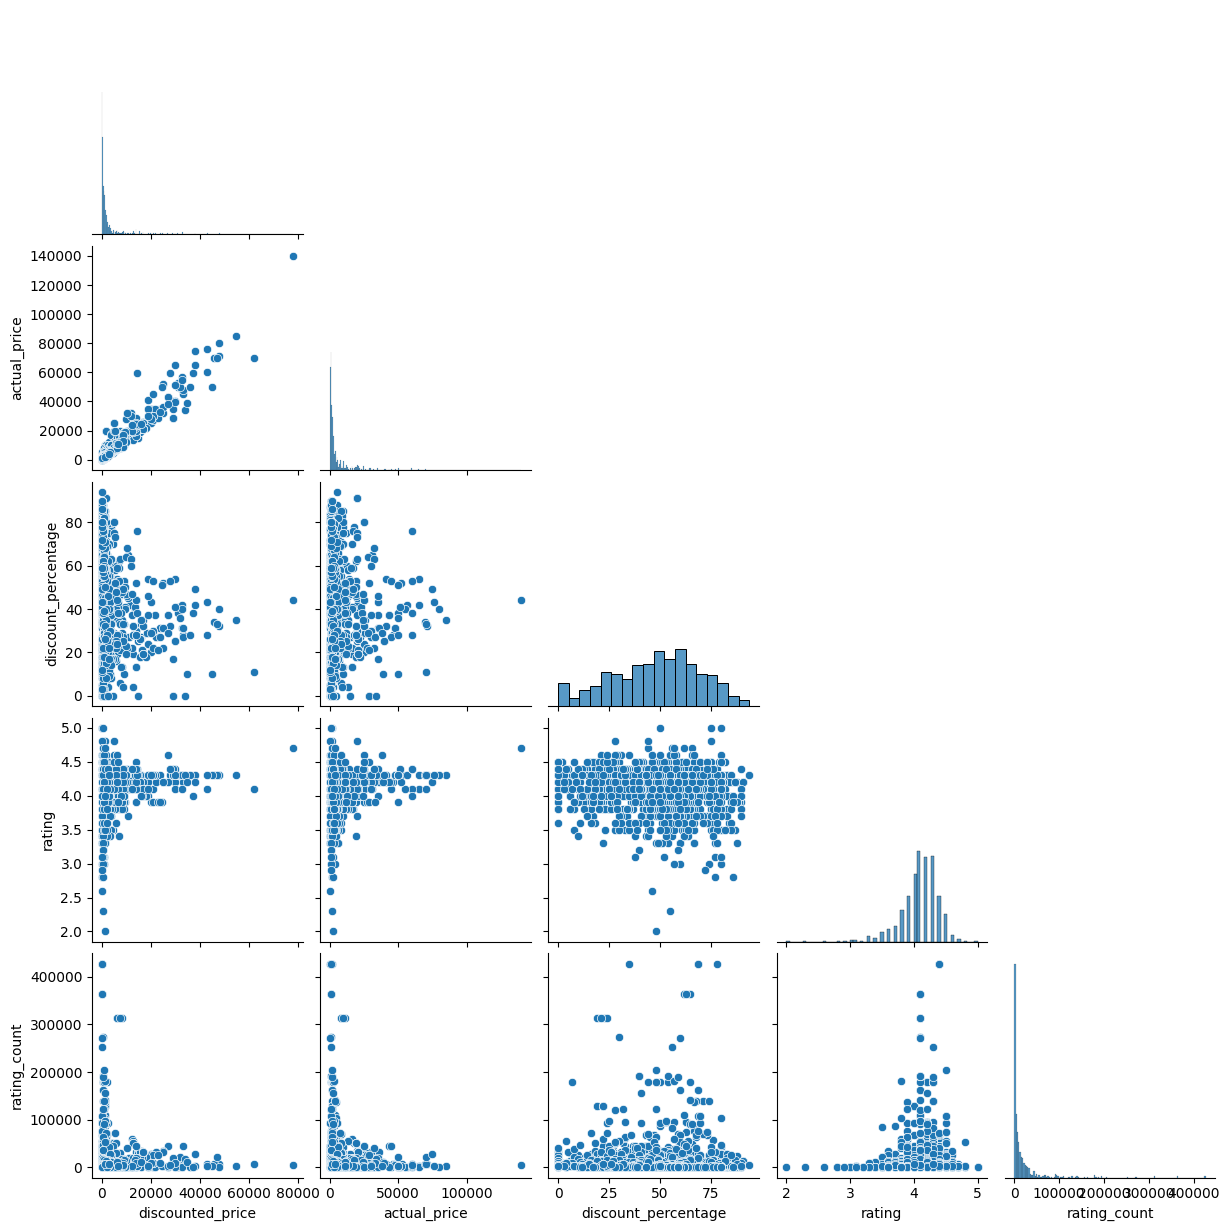

In [7]:
sns.pairplot(df, corner = True)

Для анализа берем пары с наиболее видимой корреляцией

In [8]:
df1 = df[(~df['discounted_price'].isna()) &  (~df['actual_price'].isna())  &  (~df['discount_percentage'].isna()) &  (~df['rating'].isna())&  (~df['rating_count'].isna())][['discounted_price', 'actual_price', 'discount_percentage','rating', 'rating_count']]
df1

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64.0,4.2,24269
1,199.0,349.0,43.0,4.0,43994
2,199.0,1899.0,90.0,3.9,7928
3,329.0,699.0,53.0,4.2,94363
4,154.0,399.0,61.0,4.2,16905
...,...,...,...,...,...
1460,379.0,919.0,59.0,4.0,1090
1461,2280.0,3045.0,25.0,4.1,4118
1462,2219.0,3080.0,28.0,3.6,468
1463,1399.0,1890.0,26.0,4.0,8031


C:\Python\ve\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


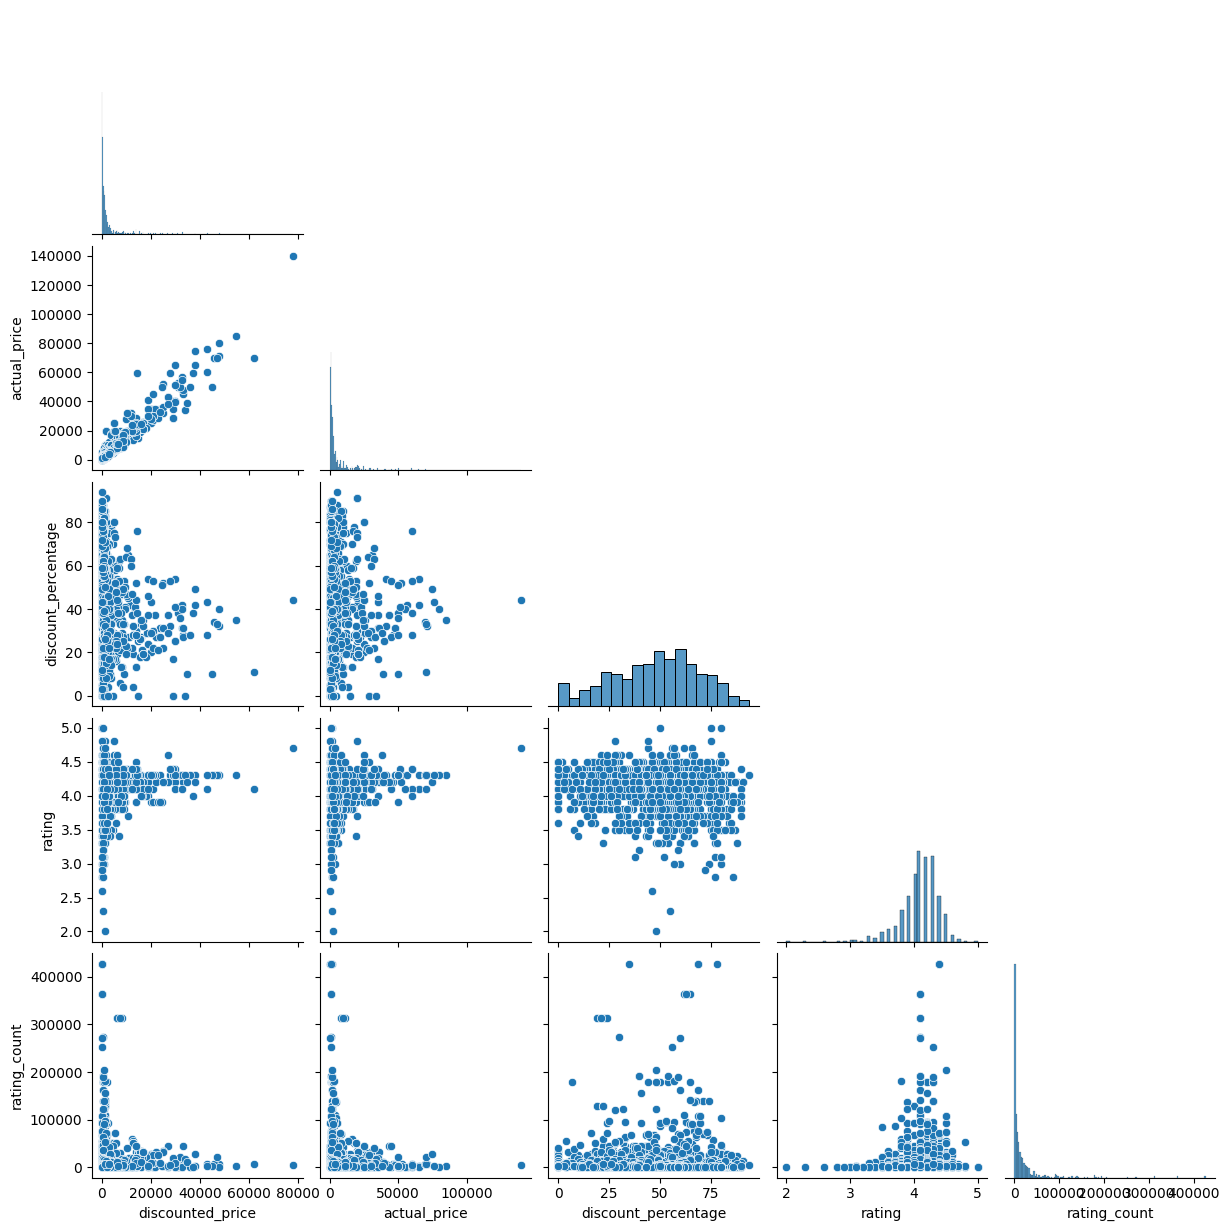

In [9]:
sns.pairplot(df1, corner=True)
plt.savefig('pairplot.png')

Самая сильная пооложительная корреляция наблюдается у актуальная цена/дисконтная цена

# Расчет коэффициентов корреляции

In [10]:
df1.corr() 

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120365,-0.027010
actual_price,0.961915,1.000000,-0.118098,0.121695,-0.035890
discount_percentage,-0.242412,-0.118098,1.000000,-0.154924,0.010869
rating,0.120365,0.121695,-0.154924,1.000000,0.101663
rating_count,-0.027010,-0.035890,0.010869,0.101663,1.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1465 non-null   float64
 1   actual_price         1465 non-null   float64
 2   discount_percentage  1465 non-null   float64
 3   rating               1465 non-null   float64
 4   rating_count         1465 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.4 KB


# Диаграмма - Heatmap

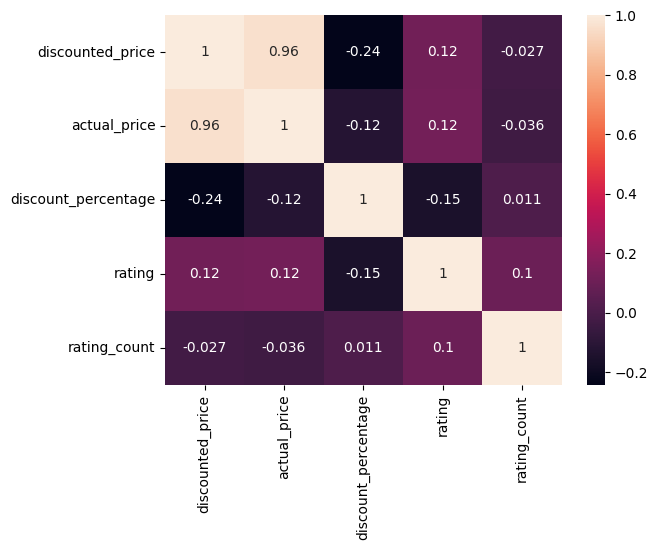

In [12]:
sns.heatmap(df1.corr(),  annot=True)
plt.savefig('heatmap.png')

# График зависимости дисконтной цены от актуальной и модель линейной регрессии

In [13]:
df2 = df1[['actual_price','discounted_price']]
df2

,actual_price,discounted_price
0,1099.0,399.0
1,349.0,199.0
2,1899.0,199.0
3,699.0,329.0
4,399.0,154.0
...,...,...
1460,919.0,379.0
1461,3045.0,2280.0
1462,3080.0,2219.0
1463,1890.0,1399.0


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
x = np.array([df2['actual_price']]).reshape((-1, 1))
x

array([[1099.],
       [ 349.],
       [1899.],
       ...,
       [3080.],
       [1890.],
       [3690.]])

In [16]:
y = df2['discounted_price']

In [17]:
lm = LinearRegression()

In [18]:
model = lm.fit(x, y)

In [19]:
model.predict([[1]]) #предсказание 

array([-218.64540795])

In [20]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -219.2596552007908
betas = [0.61424725]


In [21]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9252810058744187


In [22]:
import matplotlib.pyplot as plt

In [23]:
y_hat = model.predict(x)
y_hat

array([ 455.7980736 ,   -4.88736462,  947.19587437, ..., 1672.62187775,
        941.66764911, 2047.31270083])

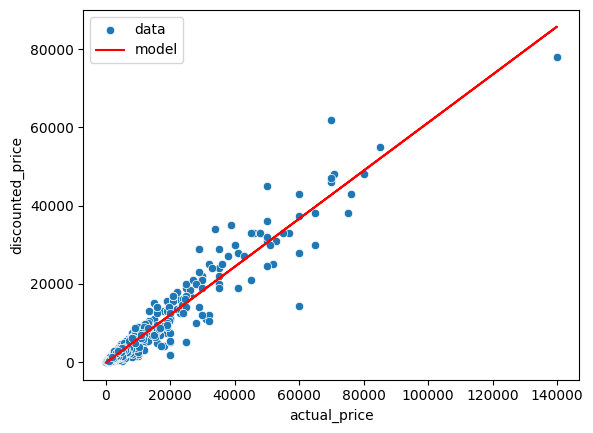

In [24]:
ax = sns.scatterplot(df2, y='discounted_price', x='actual_price')
ax.plot(x,y_hat, color = 'r')
plt.legend(['data', 'model'])
plt.savefig('lin_regr.png')

In [25]:
df['product_name'][df.actual_price>100000]

249    Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...
Name: product_name, dtype: object

In [26]:
df[df.rating<3]

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_main,category_sub,type_product,date,review_title,review_content,user_id
545,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,281.0,1999.0,86.0,2.8,87,Electronics,WearableTechnology,SmartWatches,2023-02-26,"Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...","AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q..."
1243,B0BFBNXS94,"Personal Size Blender, Portable Blender, Batte...",669.0,1499.0,55.0,2.3,13,Home&Kitchen,Kitchen&HomeAppliances,HandBlenders,2023-05-09,"Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...","AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7U..."
1286,B0BNDGL26T,MR. BRAND Portable USB Juicer Electric USB Jui...,499.0,2199.0,77.0,2.8,109,Home&Kitchen,Kitchen&HomeAppliances,JuicerMixerGrinders,2023-05-13,"Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...","AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E..."
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,1299.0,2495.0,48.0,2.0,2,Home&Kitchen,"Heating,Cooling&AirQuality",FanHeaters,2023-05-16,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ..."
1356,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse...,161.0,300.0,46.0,2.6,24,Home&Kitchen,Kitchen&HomeAppliances,VacuumSealers,2023-05-20,"It is broken,Could have been a bit better,The ...",It is broken and it is not useful. Please chan...,"AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35AN..."
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,199.0,699.0,72.0,2.9,159,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifierAccessories,2023-05-30,"Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...","AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV..."


# Построим гистограмму распределения рейтинга

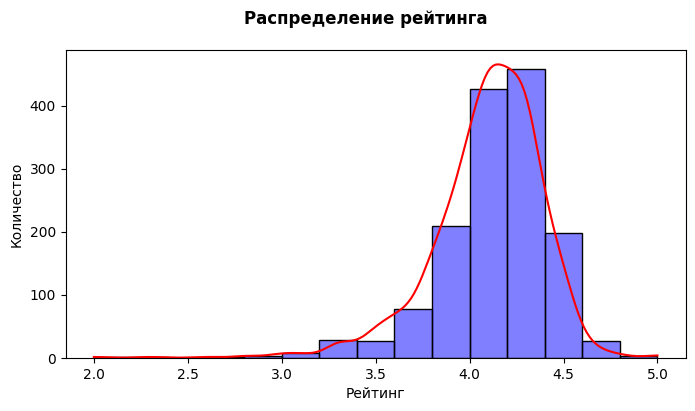

<Figure size 640x480 with 0 Axes>

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('Распределение рейтинга', fontweight='heavy', size='large')
sns.histplot( data=df, x='rating', bins=15, kde=True, color='blue') # kde -диния сглаживания
ax.lines[0].set_color('red') #изменеия цвета линии
ax.set_xlabel('Рейтинг') ##, fontweight='bold')
ax.set_ylabel('Количество') ##, fontweight='bold')
plt.show()
plt.savefig('rating.png')

Большинство продуктов имеют рейтинг от 4,0 до 4,375, при этом нет продуктов с рейтингом ниже 2,0. Распределение рейтингов слегка перекошено влево.

In [112]:
df[(df['rating']<3)][['product_name','rating', 'actual_price','discount_percentage','category_main', 'type_product' ]]

,product_name,rating,actual_price,discount_percentage,category_main,type_product
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,2.8,1999.0,86.0,Electronics,SmartWatches
1243,"Personal Size Blender, Portable Blender, Batte...",2.3,1499.0,55.0,Home&Kitchen,HandBlenders
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,2.8,2199.0,77.0,Home&Kitchen,JuicerMixerGrinders
1309,Khaitan ORFin Fan heater for Home and kitchen-...,2.0,2495.0,48.0,Home&Kitchen,FanHeaters
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,2.6,300.0,46.0,Home&Kitchen,VacuumSealers
1449,IONIX Tap filter Multilayer | Activated Carbon...,2.9,699.0,72.0,Home&Kitchen,WaterPurifierAccessories


На данные товары продавцу следует обратить внимание, для сохранения имиджа компании, проверить/исключить/заменить товары плохого качества. Также обращаем внимание, что 5 из 6 товаров, которые имеют низкие индексы относятся к категории Home&Kitchen. Цена на данные товары не превышает 2500, а скидки предоставлены в промежутке от 46% до 86%.

# Расчет взвешенного рейтинга

Взвешенный рейтинг учитывает не только средний рейтинг товара, но и количество оценок, что позволяет более точно оценить его популярность и надежность.
Чтобы посчитать взвешенный рейтинг, можно использовать формулу:
Взвешенный рейтинг = (Средний рейтинг * Количество оценок) / (Количество оценок + Константа)
Константа здесь может быть использована для учета разницы важности среднего рейтинга и количества оценок. Например, если вы считаете, что количество оценок важнее, чем средний рейтинг, то константа может быть выбрана больше 1. Если вы считаете, что средний рейтинг важнее, то константа может быть выбрана меньше 1.
Смысл взвешенного рейтинга заключается в том, что он позволяет более точно оценивать товары, учитывая не только их средний рейтинг, но и количество оценок. Это может быть полезно для покупателей, которые хотят выбрать наиболее надежный и популярный товар.
Константа фактически  пороговое количество оценок. Примем ее за 10 для товаров со стоимостью до 1500, кроме товаров со стоимостью более 10 000- для них 1, для остальных 5. 

In [29]:
df['weight']=np.where(df['actual_price']<1000,10,np.where(df['actual_price']>10000,1,5))
df['weight']

0        5
1       10
2        5
3       10
4       10
        ..
1460    10
1461     5
1462     5
1463     5
1464     5
Name: weight, Length: 1465, dtype: int32

In [30]:
df['rating_weighted'] = df['rating'] * df['rating_count']/(df['rating_count']+df['weight'])
df['rating_weighted'] = df['rating_weighted'].round(2)

In [31]:
df.loc[:,['rating','rating_weighted']]

,rating,rating_weighted
0,4.2,4.20
1,4.0,4.00
2,3.9,3.90
3,4.2,4.20
4,4.2,4.20
...,...,...
1460,4.0,3.96
1461,4.1,4.10
1462,3.6,3.56
1463,4.0,4.00


In [108]:
avg_w_rating = sum(df['rating_weighted'])/len(df)
avg_w_rating

4.034730375426618

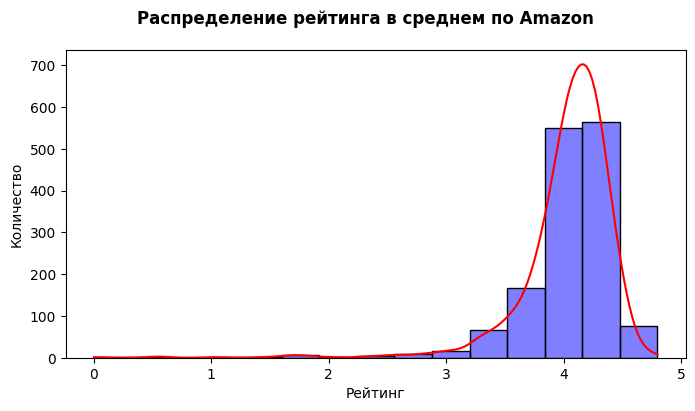

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('Распределение рейтинга в среднем по Amazon', fontweight='heavy', size='large')
sns.histplot( data=df, x='rating_weighted', bins=15, kde=True, color='blue') # kde -линия сглаживания
ax.lines[0].set_color('red') #изменеия цвета линии
ax.set_xlabel('Рейтинг') ##, fontweight='bold')
ax.set_ylabel('Количество') ##, fontweight='bold')
plt.show()
fig.savefig('weight_rating.png')

Большинство оценок клиентов попадают в диапазон 3-4 и 4-5.
В целом распределение оценок покупателей говорит о том, что большинство покупателей удовлетворены продукцией, но могут быть возможности для улучшения, чтобы увеличить количество положительных оценок.

# Анализ категорий товаров

In [33]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'category_main',
       'category_sub', 'type_product', 'date', 'review_title',
       'review_content', 'user_id', 'weight', 'rating_weighted'],
      dtype='object')

In [34]:
df['category_main'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

Сводная таблица по категориям

In [35]:
table = df[['category_main', 'category_sub', 'product_id']]
table_pivot = pd.pivot_table(table, index=['category_main', 'category_sub'], aggfunc='count')
table_pivot

product_id
category_main         category_sub                                       
Car&Motorbike         CarAccessories                                    1
Computers&Accessories Accessories&Peripherals                         381
                      Components                                        5
                      ExternalDevices&DataStorage                      18
                      Laptops                                           1
                      Monitors                                          2
                      NetworkingDevices                                34
                      Printers,Inks&Accessories                        11
                      Tablets                                           1
Electronics           Accessories                                      14
                      Cameras&Photography                              16
                      GeneralPurposeBatteries&BatteryChargers          14
                      Headphones,Earbuds&Accessories                   66
                      HomeAudio                                        16
                      HomeTheater,TV&Video                            162
                      Mobiles&Accessories                             161
                      PowerAccessories                                  1
                      WearableTechnology                               76
Health&PersonalCare   HomeMedicalSupplies&Equipment                     1
Home&Kitchen          CraftMaterials                                    7
                      Heating,Cooling&AirQuality                      116
                      HomeStorage&Organization                         16
                      Kitchen&Dining                                    1
                      Kitchen&HomeAppliances                          308
HomeImprovement       Electrical                                        2
MusicalInstruments    Microphones                                       2
OfficeProducts        OfficeElectronics                                 4
                      OfficePaperProducts                              27
Toys&Games            Arts&Crafts                                       1

In [36]:
#анализ распределения продуктов по главной категории
category_counts= df['category_main'].value_counts()
category_counts.values

array([526, 453, 448,  31,   2,   2,   1,   1,   1], dtype=int64)

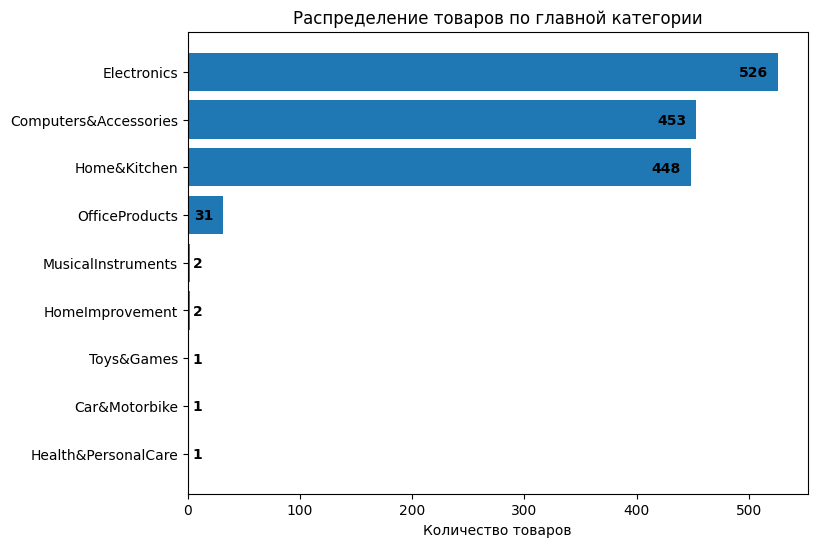

In [37]:
plt.figure(figsize=(8, 6))
plt.barh( category_counts.index, category_counts.values)
plt.xlabel('Количество товаров')
plt.title('Распределение товаров по главной категории')
plt.gca().invert_yaxis()
for i, v in enumerate(category_counts):
    plt.text(v - 35 if v > 100 else v-25 if v > 10 else v + 3, i + 0.1, str(v), color='black', fontweight='bold')

plt.savefig('main_category.png')
plt.show()

В тройку лидеров входят «Электроника», «Компьютеры и аксессуары» и «Дом и кухня». Далее следуют Товары для офисса. 
Данные категории популярны среди клиентов.
Количество товаров в остальных основных категориях достаточно низкое, что говорит о том, что спрос на эти товары небольшой.
Данная информация может помочь компании понять текущие тенденции рынка и определить потенциальные возможности для роста в конкретных категориях.

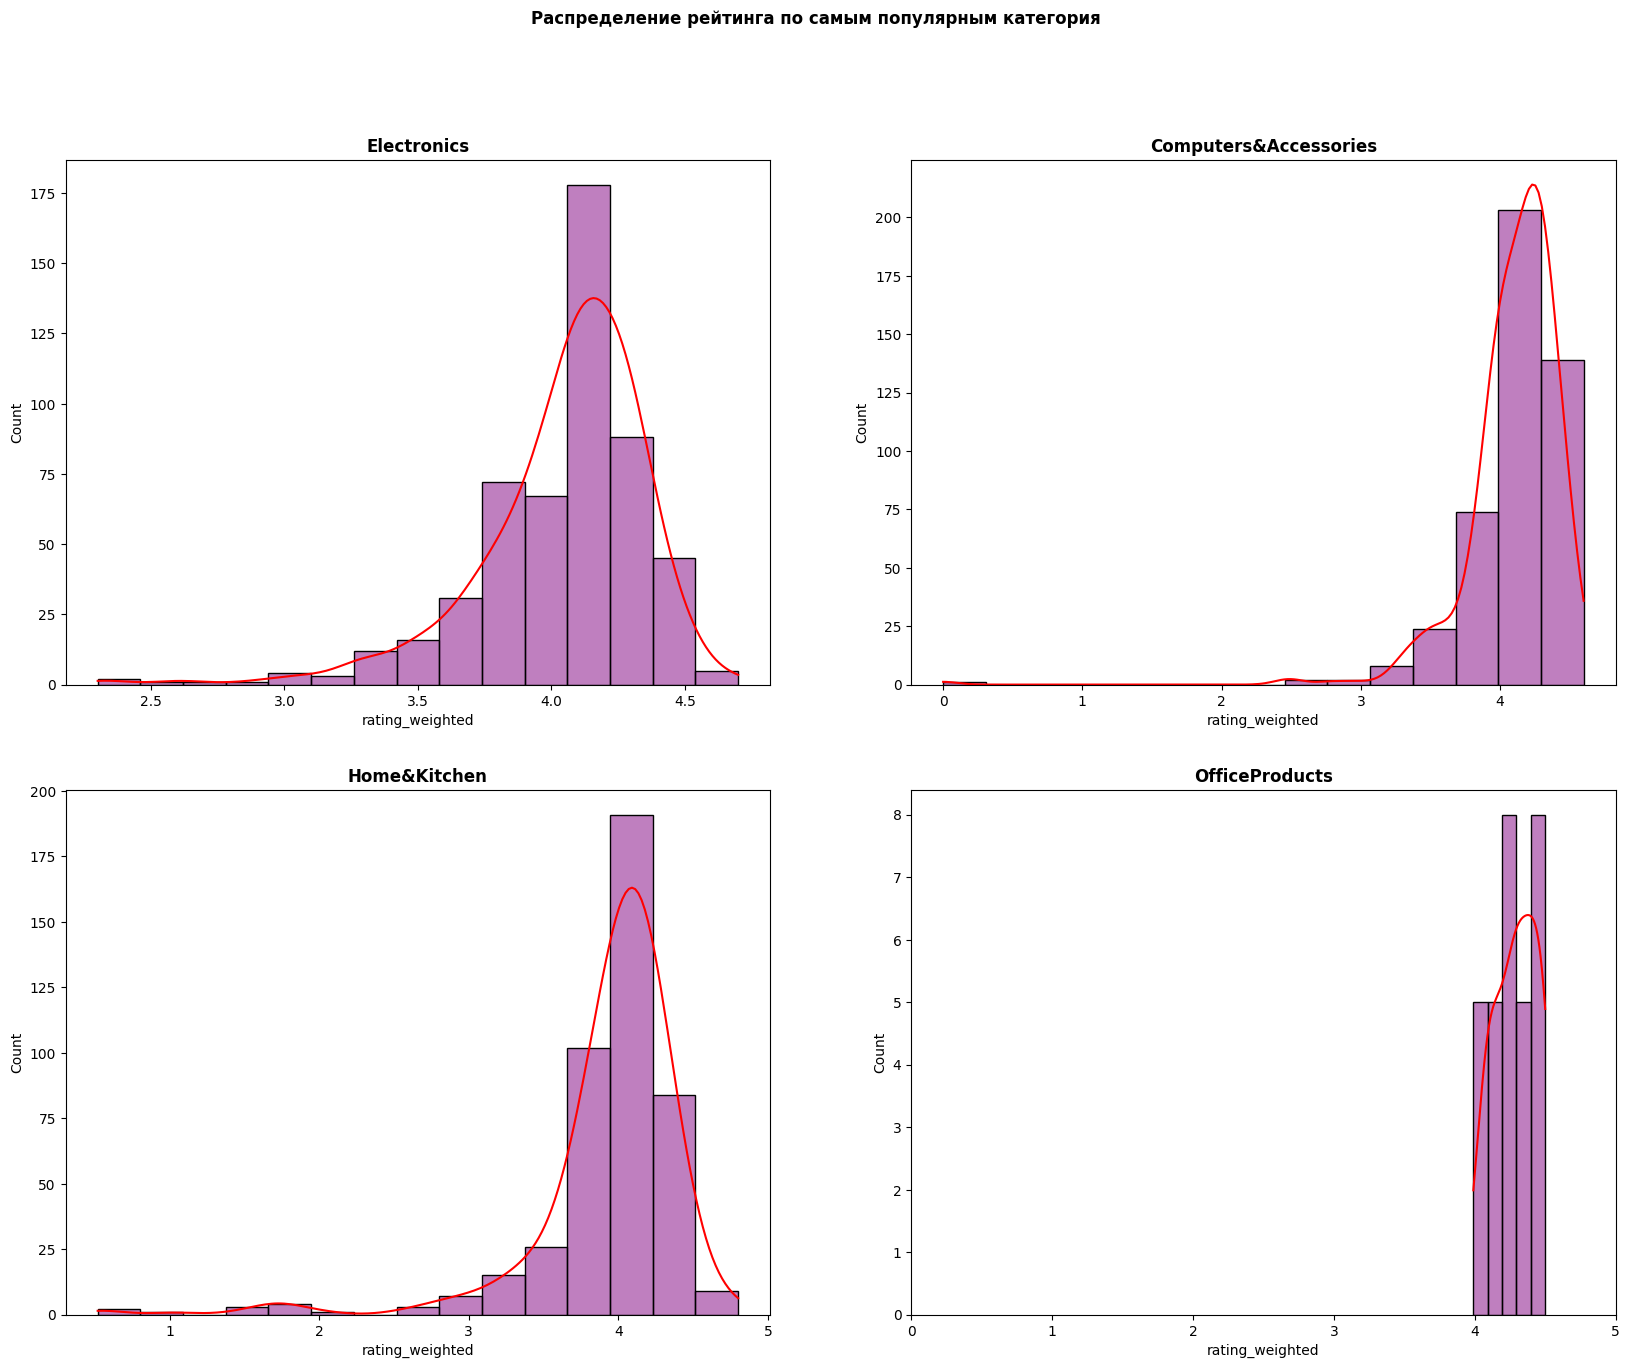

In [38]:
fig, ax = plt.subplots(2,2 , figsize=(20, 15))

fig.suptitle('Распределение рейтинга по самым популярным категория', fontweight='heavy', size='large')

sns.histplot(ax=ax[0,0], data=df[df['category_main']=='Electronics'], x='rating_weighted', bins=15, kde=True, color='purple')
sns.histplot(ax=ax[0,1], data=df[df['category_main']=='Computers&Accessories'], x='rating_weighted', bins=15, kde=True, color='purple')
sns.histplot(ax=ax[1,0], data=df[df['category_main']=='Home&Kitchen'], x='rating_weighted', bins=15, kde=True, color='purple')
sns.histplot(ax=ax[1,1], data=df[df['category_main']=='OfficeProducts'], x='rating_weighted', bins=5, kde=True, color='purple')

plt.xlim (0, 5)
#ax[0,0].set_xlabel('Rating', fontweight='bold')
#ax[0,0].set_ylabel('Count', fontweight='bold')
ax[0,0].lines[0].set_color('red')
ax[0,1].lines[0].set_color('red')
ax[1,0].lines[0].set_color('red')
ax[1,1].lines[0].set_color('red')
ax[0,0].set_title('Electronics', fontweight='bold')
ax[0,1].set_title('Computers&Accessories', fontweight='bold')
ax[1,0].set_title('Home&Kitchen', fontweight='bold')
ax[1,1].set_title('OfficeProducts', fontweight='bold')

plt.savefig('rating_popular.png')
plt.show()

Вывод:

In [39]:
subcategory_counts= df['category_sub'].value_counts()
subcategory_counts=subcategory_counts[:16]
subcategory_counts

category_sub
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
Name: count, dtype: int64

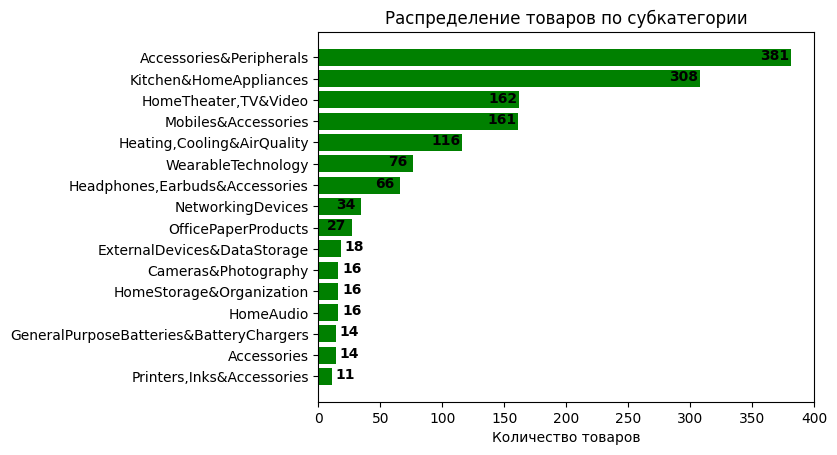

In [40]:
plt.barh( subcategory_counts.index, subcategory_counts.values, color='green')
plt.xlabel('Количество товаров')
plt.title('Распределение товаров по субкатегории')
plt.gca().invert_yaxis()
for i, v in enumerate(subcategory_counts):
    plt.text(v - 25 if v > 100 else v-20 if v > 20 else v + 3, i + 0.1, str(v), color='black', fontweight='bold')

plt.savefig('sub_category.png')
plt.show()

In [41]:
type_product_counts= df['type_product'].value_counts()
type_product_counts=type_product_counts[:15]
type_product_counts

type_product
USBCables              233
SmartWatches            76
Smartphones             68
SmartTelevisions        63
In-Ear                  52
RemoteControls          49
MixerGrinders           27
HDMICables              24
DryIrons                24
Mice                    24
InstantWaterHeaters     23
LintShavers             22
FanHeaters              20
ElectricHeaters         20
ElectricKettles         19
Name: count, dtype: int64

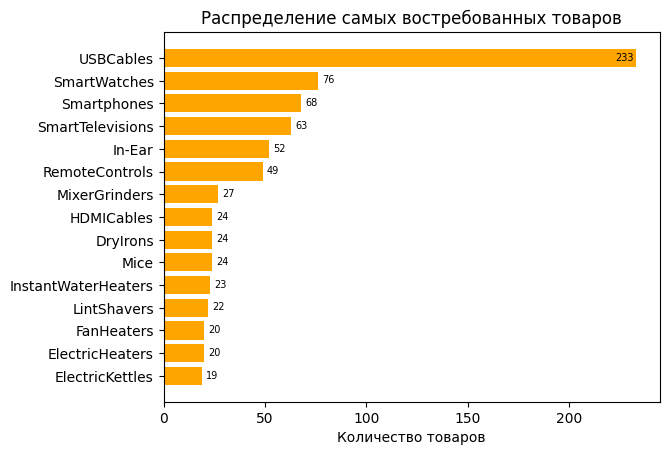

Топ 15 товаров:
         Топ товары  Количество товаров
          USBCables                 233
       SmartWatches                  76
        Smartphones                  68
   SmartTelevisions                  63
             In-Ear                  52
     RemoteControls                  49
      MixerGrinders                  27
         HDMICables                  24
           DryIrons                  24
               Mice                  24
InstantWaterHeaters                  23
        LintShavers                  22
         FanHeaters                  20
    ElectricHeaters                  20
    ElectricKettles                  19


In [42]:
plt.barh( type_product_counts.index, type_product_counts.values, color='orange')
plt.xlabel('Количество товаров')
plt.title('Распределение самых востребованных товаров')
plt.gca().invert_yaxis()
for i, v in enumerate(type_product_counts): #подписи данных сдвигаю
    plt.text(v - 10 if v > 100 else  v + 2, i + 0.1, str(v), color='black',  size = 7)
plt.savefig('type_product.png')
plt.show()
top_product = pd.DataFrame({'Топ товары': type_product_counts.index, 'Количество товаров': type_product_counts.values})
print('Топ 15 товаров:')
print(top_product.to_string(index=False))


##### К топ шесть популярных товаров относятся USB-кабели, умные часы, смартфоны, умные телевизоры, наушники и пульты дистанционного управления.Это самые популярные подкатегории, и компании могут сосредоточиться на рекламе данных товаров для привлечения клиентов.

 Другие популярные товары включают миксеры, кабели HDMI, утюги, мыши и проточные водонагреватели.Возможно, эти товары менее популярны, чем первые шесть, но изучая количество купленных товаров, можно сделать вывод о о наличии спроса на них.

Данные показывают, что в топ-15 входят разнообразные товары, включая кухонную технику, бытовую электронику и личные аксессуары.Это подчеркивает важность предложения разнообразных продуктов для удовлетворения различных потребностей и предпочтений клиентов.

В целом, данные могут помочь компаниям определить наиболее популярные товары и скорректировать свои предложения в соответствии с потребительским спросом. Сосредоточив внимание на этих товарах, компании могут увеличить свои продажи и повысить свою конкурентоспособность на рынке.

# Рекомендация для потребителей

In [43]:
df[((df['rating']>4.5) & (df['discount_percentage']>50)& (df['rating_count']>10))][['product_name', 'rating', 'rating_count', 'discount_percentage','review_title']]

,product_name,rating,rating_count,discount_percentage,review_title
137,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",4.6,3664,58.0,"Fantastic Ultra High Speed HDMI cable,Amazing ..."
447,Spigen EZ Fit Tempered Glass Screen Protector ...,4.6,26603,66.0,"Easy to install but a bit slippery,Very good p..."
459,Spigen EZ Fit Tempered Glass Screen Protector ...,4.7,7779,66.0,"Easy to install,Best screen guard and the easi..."
468,Spigen EZ Fit Tempered Glass Screen Protector ...,4.6,6129,66.0,"Best For It’s Money!🔥,Nice quality, but comes ..."
571,"WeCool S5 Long Selfie Stick, with Large Reinfo...",4.6,245,55.0,"Good,Good Product but Little expensive.,Happy ..."
1007,"WeCool S5 Long Selfie Stick, with Large Reinfo...",4.6,245,55.0,"Good,Good Product but Little expensive.,Happy ..."
1119,Lint Remover Woolen Clothes Lint Extractor Bat...,4.6,124,57.0,"good,Overall good product but got stop inbetwe..."
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",4.7,1729,56.0,"Nice product,Not as effective as claimed, just..."
1226,Zuvexa USB Rechargeable Electric Foam Maker - ...,4.7,54,62.0,"Little kitchen helper,An amazing product,Very ..."
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,4.7,2300,56.0,"Amazing! Value for money!,Very easy to use,2 i..."


Рекомендации для потребителя, товары на которые стоит обратить внимание. У них высокий рейтинг (более 4.5), представлена скидка более 50% и значительное количеством отметок пользователей

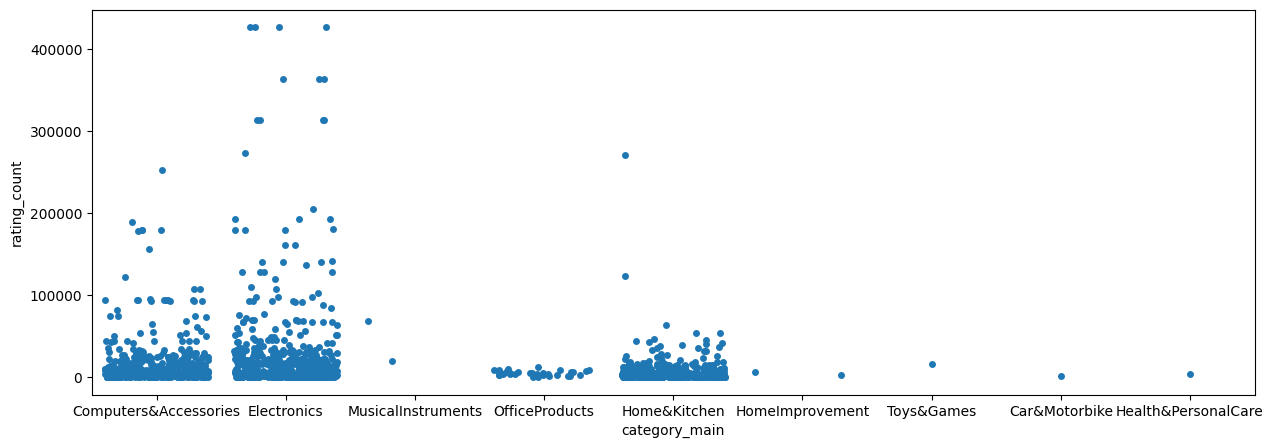

In [106]:
plt.figure(figsize=(15,5))
sns.stripplot(data=df, x='category_main', y='rating_count', jitter=0.40)
plt.savefig('demand.png')

количество продуктов в каждой категории, имеющих высокий спрос

# АВС - анализ

In [44]:
a = df.groupby('type_product').agg({'discounted_price':sum})

In [45]:
a

,discounted_price
type_product,
3DGlasses,2699.00
AVReceivers&Amplifiers,1990.00
Adapters,449.00
Adapters&Multi-Outlets,425.00
AirFryers,31382.00
...,...
WetGrinders,7367.66
WireboundNotebooks,565.00
WirelessUSBAdapters,12998.00


In [46]:
groupped_df=(a['discounted_price']/sum(a['discounted_price'])).sort_values(ascending=False)
groupped_df

type_product
SmartTelevisions          0.341794
Smartphones               0.233981
SmartWatches              0.038837
WaterFilters&Purifiers    0.018386
USBCables                 0.018357
                            ...   
WoodenPencils             0.000022
ColouredPaper             0.000022
Earpads                   0.000022
Pens                      0.000020
Shower&WallMounts         0.000019
Name: discounted_price, Length: 207, dtype: float64

In [47]:
groupped_df = groupped_df.cumsum().reset_index()
groupped_df

,type_product,discounted_price
0,SmartTelevisions,0.341794
1,Smartphones,0.575775
2,SmartWatches,0.614612
3,WaterFilters&Purifiers,0.632998
4,USBCables,0.651355
...,...,...
202,WoodenPencils,0.999918
203,ColouredPaper,0.999939
204,Earpads,0.999961
205,Pens,0.999981


In [48]:
groupped_df['ABC']=np.where(groupped_df['discounted_price']<0.8,'A',np.where(groupped_df['discounted_price']<0.95,'B','C'))

In [49]:
groupped_df[groupped_df['ABC']== 'A']

,type_product,discounted_price,ABC
0,SmartTelevisions,0.341794,A
1,Smartphones,0.575775,A
2,SmartWatches,0.614612,A
3,WaterFilters&Purifiers,0.632998,A
4,USBCables,0.651355,A
5,MixerGrinders,0.669074,A
6,StorageWaterHeaters,0.685647,A
7,InstantWaterHeaters,0.697714,A
8,In-Ear,0.708801,A
9,FanHeaters,0.719591,A


Товары которые приносят наибольшую прибыль 80%

In [50]:
groupped_df.to_csv ('abc_analysis.csv',index= False)

Анализ потребителей

In [51]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'category_main',
       'category_sub', 'type_product', 'date', 'review_title',
       'review_content', 'user_id', 'weight', 'rating_weighted'],
      dtype='object')

In [52]:
users = df['user_id'].value_counts().loc[lambda x : x > 1].reset_index()
users.head(20)

,user_id,count
0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10
1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",8
2,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...",8
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",7
4,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",7
5,"AHWRZWPCTG6ICA7WTNLNNZXWFI5Q,AF2AASVYVSROFD7FX...",6
6,"AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN54...",6
7,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",5
8,"AF477BP57JM7Z4JD4PYB2K33R6AQ,AGTDD34Y77OB36JNY...",5
9,"AF2IRSQZKMBGX44YDNUPYRHWXOZQ,AF6VSSXOI3Y4PZCNR...",5


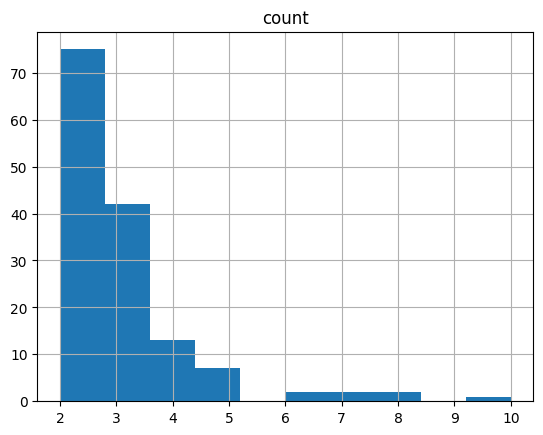

In [53]:
users.hist();

### Коэффициент повторных покупок (Repeat Purchase Rate)

Repeat purchasing rate — это процент клиентов, которые купили ваши продукты более одного раза. Коэффициент повторных покупок показывает, сколько клиентов возвращаются после первой покупки — а, значит, им можно пользоваться как индикатором retention.

Чтобы рассчитать показатель, нужно разделить количество “повторных” клиентов на общее число клиентов.

In [54]:
repeat_users = len(users)
repeat_users

144

In [55]:
unique_users =len(df['user_id'].unique())
unique_users

1194

In [56]:
RPR = repeat_users/unique_users*100
RPR

12.060301507537687

In [57]:
vip_users = df.groupby('user_id')['discounted_price'].sum().loc[lambda x : x > 10000].sort_values(ascending = False).reset_index()
vip_users

,user_id,discounted_price
0,"AHDIDVECFGA6OQRNUBPUO6366UGQ,AFSII6HTAHTHGXERU...",157969.0
1,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...",115495.0
2,"AG3QTVXT2ODRVKOQJJRDV5KA2F2A,AGEYM57JOHPNX77ZY...",104998.0
3,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...",103992.0
4,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...",99995.0
...,...,...
69,"AG6TQFT2J2BQW67NBTLB4X6XYC5A,AGGFJ5HSIY4FHH4F7...",11990.0
70,"AEGZAYS4PGUN7JSO2F4KZDPBJTPQ,AGBXHU37JYAN7SI2H...",10990.0
71,"AFRONQAZPYZARLWLDQM2VXS7ZTIQ,AGA5INGXTDEODK7X5...",10901.0
72,"AEHCVDRO2RQCQNWQH25CS6227BOA,AESDNVY2THX3KM33O...",10389.0


In [58]:
vip_users.to_csv ('vip_users.csv',index= False)

In [99]:
ARPU = sum(df['discounted_price'])/unique_users
ARPU

3834.656976549413

In [96]:
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_main,category_sub,type_product,date,review_title,review_content,user_id,weight,rating_weighted
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",5,4.20
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",10,4.00
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",5,3.90
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53.0,4.2,94363,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",10,4.20
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.0,4.2,16905,Computers&Accessories,Accessories&Peripherals,USBCables,2023-01-01,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",10,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59.0,4.0,1090,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifierAccessories,2023-05-31,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",10,3.96
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25.0,4.1,4118,Home&Kitchen,Kitchen&HomeAppliances,Rice&PastaCookers,2023-05-31,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",5,4.10
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28.0,3.6,468,Home&Kitchen,"Heating,Cooling&AirQuality",HeatConvectors,2023-05-31,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...","AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",5,3.56
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26.0,4.0,8031,Home&Kitchen,"Heating,Cooling&AirQuality",ExhaustFans,2023-05-31,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...",5,4.00
